In [ ]:
# Geopandas density plots
# Time series plots
# Newborns tetanus -> health expenditure (correlated with mortality rate)
# improved sanitation, improved water source -> mortality rate

In [ ]:
%%capture
!pip install geopandas
!pip install geoplot

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

dfn = pd.read_csv('/content/gdrive/MyDrive/AI Masters/Data Visualization/IndicatorsV2_Normalized.csv')
dfu = pd.read_csv('/content/gdrive/MyDrive/AI Masters/Data Visualization/IndicatorsV3_Unnormalized.csv')

european_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                      'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                      'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                      'United Kingdom', 'Serbia', 'Belarus', 'Moldova', 'Albania', 'Montenegro', 'Bosnia and Herzegovina', 'Kosovo', 'Montenegro', 
                      'Macedonia, FYR', 'Ukraine', 'Iceland']

eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                'United Kingdom']

Mounted at /content/gdrive


## Geographical Heatmaps

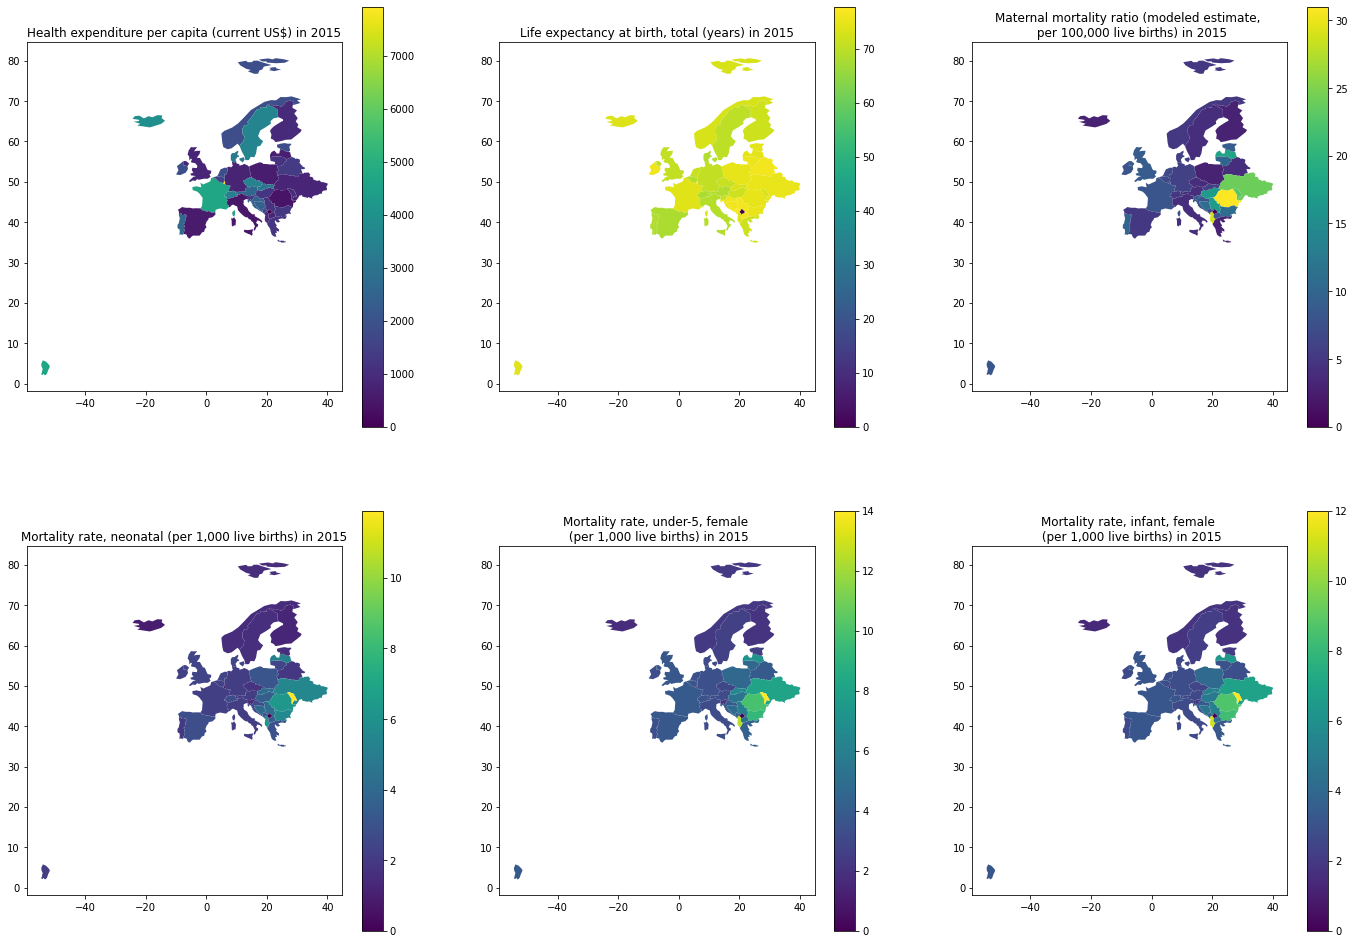

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent == 'Europe']

world.columns = ['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']

world = world.replace('Macedonia', 'Macedonia, FYR')
world = world.replace('Czechia', 'Czech Republic')
world = world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina')
world = world.replace('Slovakia', 'Slovak Republic')

cols = ['Health expenditure per capita (current US$)', 
        'Life expectancy at birth, total (years)',
        'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
        'Mortality rate, neonatal (per 1,000 live births)', 
        'Mortality rate, under-5, female (per 1,000 live births)', 
        'Mortality rate, infant, female (per 1,000 live births)']
col_idx_map = {1: 'Health expenditure per capita (current US$)', 
               2: 'Life expectancy at birth, total (years)',
               3: 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
               4: 'Mortality rate, neonatal (per 1,000 live births)',
               5: 'Mortality rate, under-5, female (per 1,000 live births)', 
               6: 'Mortality rate, infant, female (per 1,000 live births)'}
name_idx_map = {1: 'Health expenditure per capita (current US$)', 
                2: 'Life expectancy at birth, total (years)',
                3: 'Maternal mortality ratio (modeled estimate, \n per 100,000 live births)',
                4: 'Mortality rate, neonatal (per 1,000 live births)',
                5: 'Mortality rate, under-5, female \n (per 1,000 live births)', 
                6: 'Mortality rate, infant, female \n (per 1,000 live births)'}
df_list = []

for col in cols:
    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    merge = pd.merge(world, df1, on='Country')
    df_list.append(merge)

fig, axes = plt.subplots(2, 3)
fig.set_figwidth(24)
fig.set_figheight(17)

count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot(column=col_idx_map[count+1], ax=axes[r, c], legend=True)
        ax.title.set_text(name_idx_map[count+1] + ' in 2015')
        count += 1
        

plt.show()

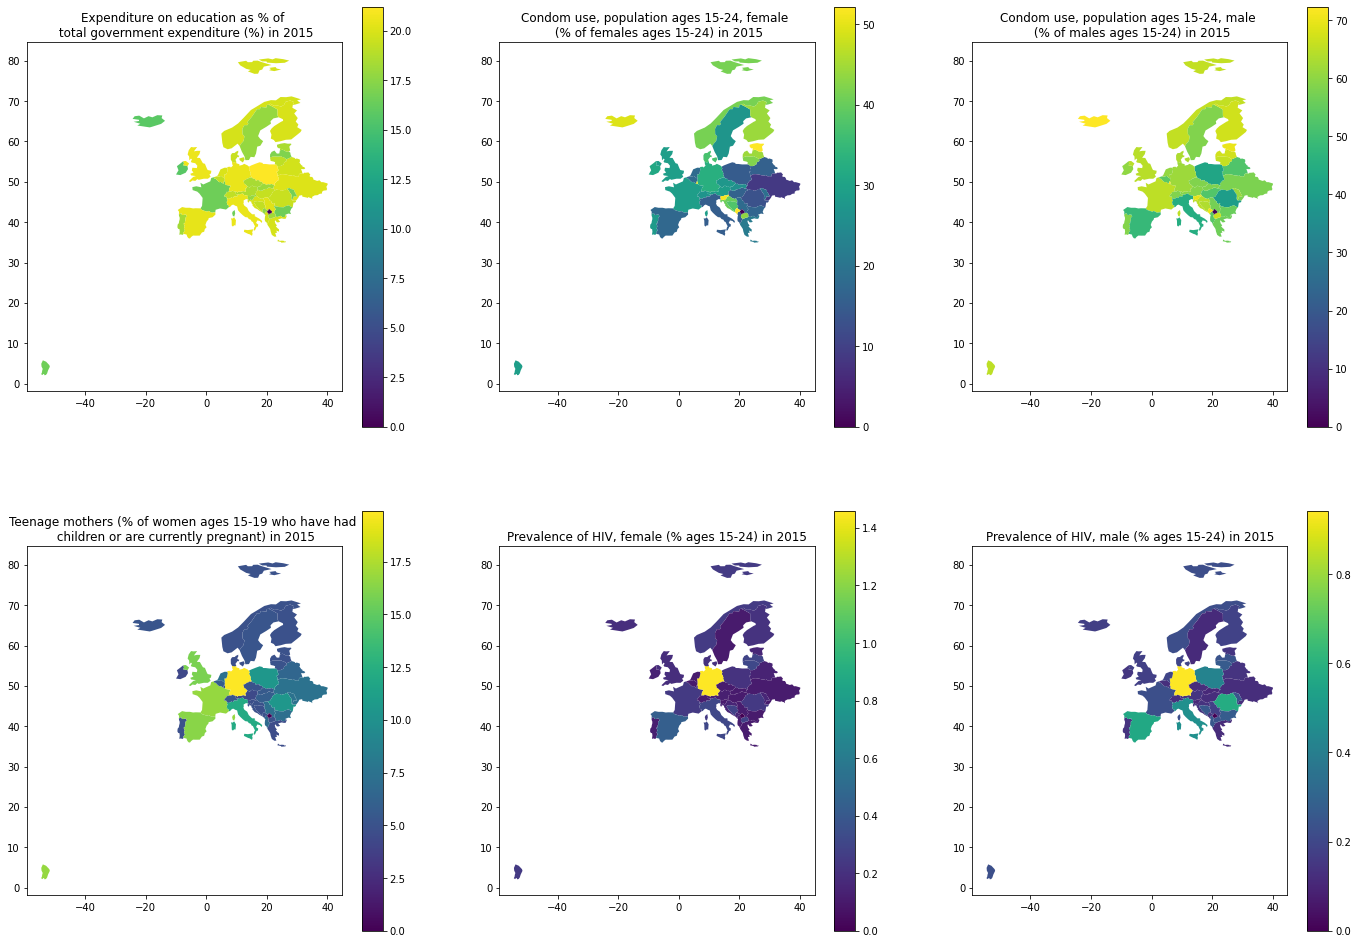

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent == 'Europe']

world.columns = ['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']

world = world.replace('Macedonia', 'Macedonia, FYR')
world = world.replace('Czechia', 'Czech Republic')
world = world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina')
world = world.replace('Slovakia', 'Slovak Republic')

cols = ['Expenditure on education as % of total government expenditure (%)',
        'Condom use, population ages 15-24, female (% of females ages 15-24)', 
        'Condom use, population ages 15-24, male (% of males ages 15-24)', 
        'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
        'Prevalence of HIV, female (% ages 15-24)', 
        'Prevalence of HIV, male (% ages 15-24)']
col_idx_map = {1: 'Expenditure on education as % of total government expenditure (%)', 
               2: 'Condom use, population ages 15-24, female (% of females ages 15-24)',
               3: 'Condom use, population ages 15-24, male (% of males ages 15-24)', 
               4: 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
               5: 'Prevalence of HIV, female (% ages 15-24)',
               6: 'Prevalence of HIV, male (% ages 15-24)'}
name_idx_map = {1: 'Expenditure on education as % of \n total government expenditure (%)', 
                2: 'Condom use, population ages 15-24, female \n (% of females ages 15-24)',
                3: 'Condom use, population ages 15-24, male \n (% of males ages 15-24)', 
                4: 'Teenage mothers (% of women ages 15-19 who have had \n children or are currently pregnant)',
                5: 'Prevalence of HIV, female (% ages 15-24)',
                6: 'Prevalence of HIV, male (% ages 15-24)'}
df_list = []

for col in cols:
    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    merge = pd.merge(world, df1, on='Country')
    df_list.append(merge)

fig, axes = plt.subplots(2, 3)
fig.set_figwidth(24)
fig.set_figheight(17)

count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot(column=col_idx_map[count+1], ax=axes[r, c], legend=True)
        ax.title.set_text(name_idx_map[count+1] + ' in 2015')
        count += 1

plt.show()

## Time Series

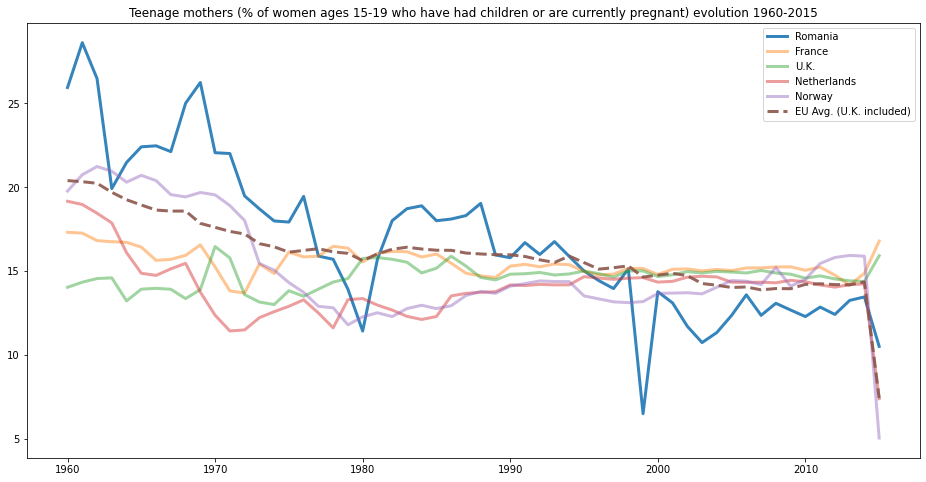

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(8)
feature = 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)'
# Improved sanitation facilities (% of population with access)
ax.set_title(feature + ' evolution 1960-2015')

means = []
for year in range(1960, 2016):
    means.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Romania'][feature], 
        label='Romania', linewidth=3, alpha=0.9)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'France'][feature], 
        label='France', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'United Kingdom'][feature], 
        label='U.K.', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Netherlands'][feature], 
        label='Netherlands', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Norway'][feature], 
        label='Norway', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        means, label='EU Avg. (U.K. included)', linewidth=3, alpha=0.9, linestyle='--')

plt.legend(loc='best')

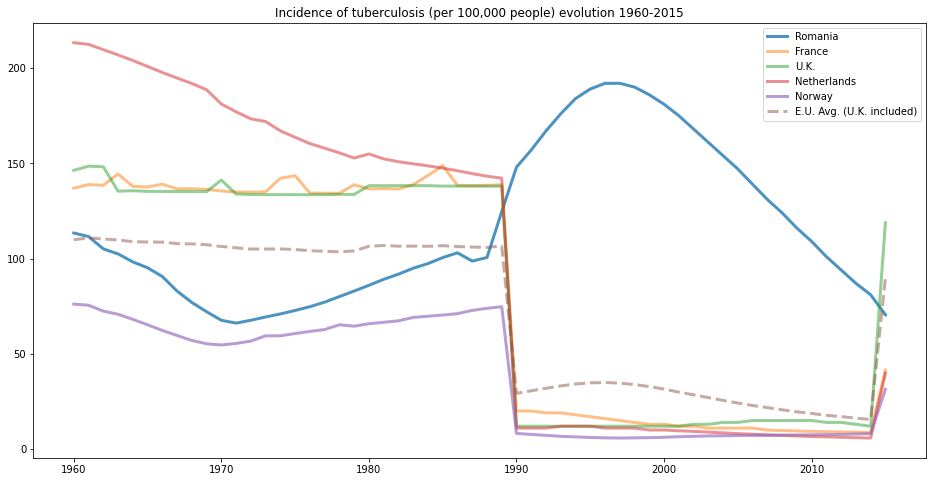

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(8)
feature = 'Incidence of tuberculosis (per 100,000 people)'
ax.set_title(feature + ' evolution 1960-2015')

means = []
for year in range(1960, 2016):
    means.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Romania'][feature], 
        label='Romania', linewidth=3, alpha=0.8)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'France'][feature], 
        label='France', linewidth=3, alpha=0.5)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'United Kingdom'][feature], 
        label='U.K.', linewidth=3, alpha=0.5)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Netherlands'][feature], 
        label='Netherlands', linewidth=3, alpha=0.5)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Norway'][feature], 
        label='Norway', linewidth=3, alpha=0.65)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        means, label='E.U. Avg. (U.K. included)', linewidth=3, alpha=0.5, linestyle='--')

plt.legend(loc='best')

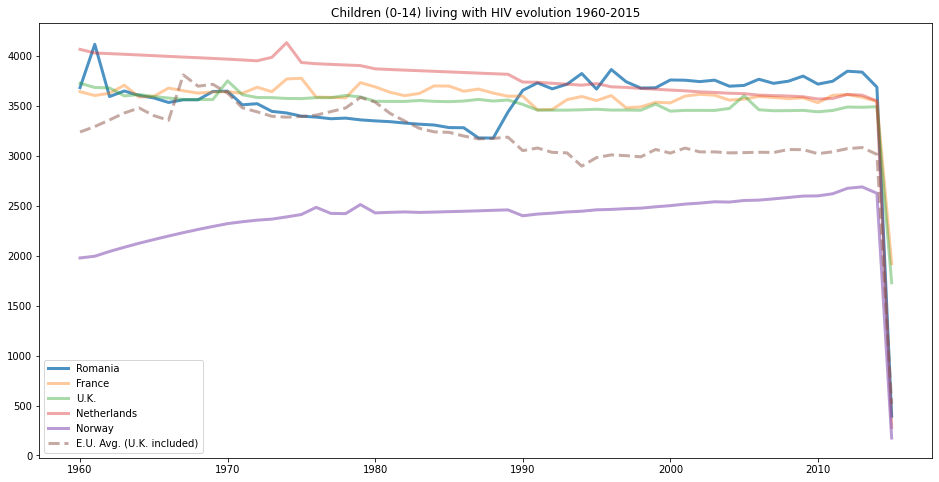

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(8)
feature = 'Children (0-14) living with HIV'
ax.set_title(feature + ' evolution 1960-2015')

means = []
for year in range(1960, 2016):
    means.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Romania'][feature], 
        label='Romania', linewidth=3, alpha=0.8)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'France'][feature], 
        label='France', linewidth=3, alpha=0.4)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'United Kingdom'][feature], 
        label='U.K.', linewidth=3, alpha=0.4)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Netherlands'][feature], 
        label='Netherlands', linewidth=3, alpha=0.4)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Norway'][feature], 
        label='Norway', linewidth=3, alpha=0.65)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        means, label='E.U. Avg. (U.K. included)', linewidth=3, alpha=0.5, linestyle='--')

plt.legend(loc='best')

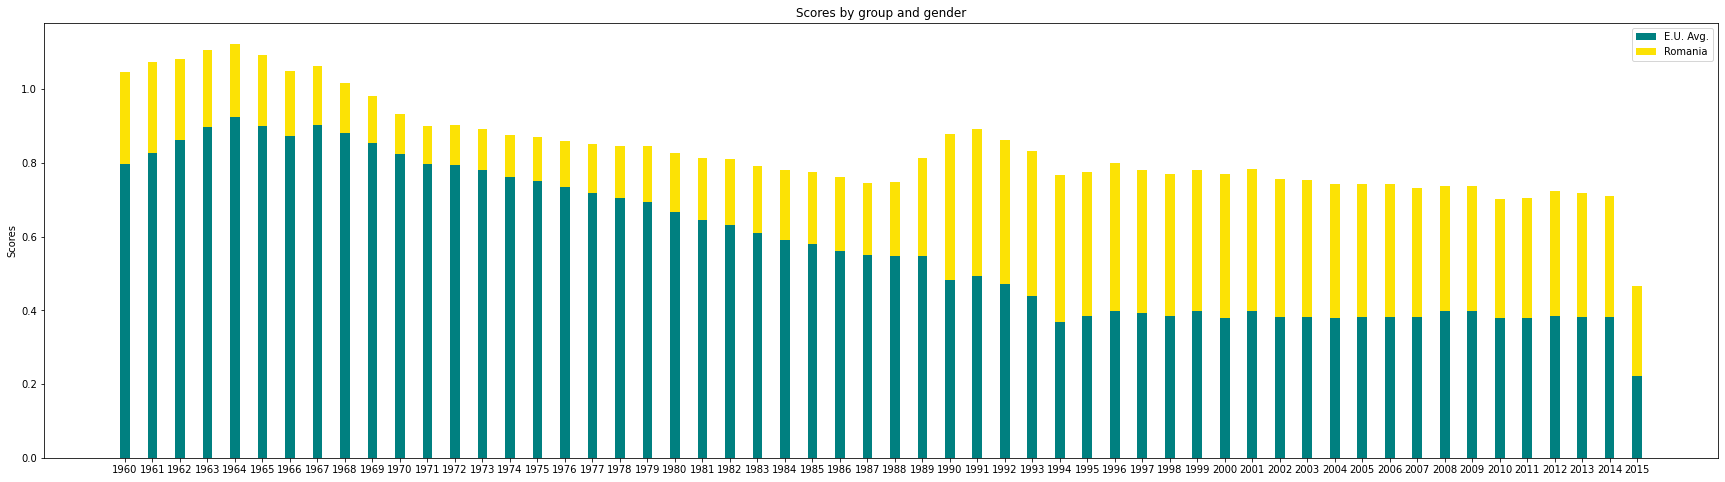

In [ ]:
feature = 'Prevalence of HIV, female (% ages 15-24)'

x = list(range(1960, 2016)) 
width = 0.35 
eu_mean = []
for year in range(1960, 2016):
    eu_mean.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ro = dfu[dfu['Country'] == 'Romania'][feature]
no = dfu[dfu['Country'] == 'Denmark'][feature]

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(8)

ax.bar(x, eu_mean, width, label='E.U. Avg.', color='#008080')
ax.bar(x, ro, width, bottom=eu_mean, label='Romania', color='#fce205')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
ax.legend()

plt.show()

## Newborns tetanus -> Health Expenditure (correlated with Mortality Rate)
## Improved Sanitation, Improved Water Source -> Mortality Rate

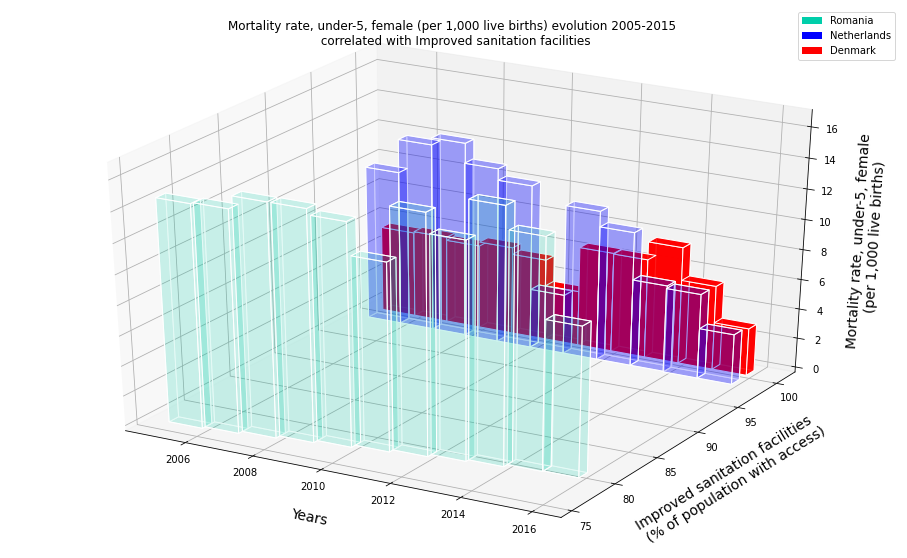

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Mortality rate, under-5, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Mortality rate, under-5, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Denmark']['Year']
ypos = dfu1[dfu1['Country'] == 'Denmark']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Denmark']['Mortality rate, under-5, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Mortality rate, under-5, female \n (per 1,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Mortality rate, under-5, female (per 1,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()

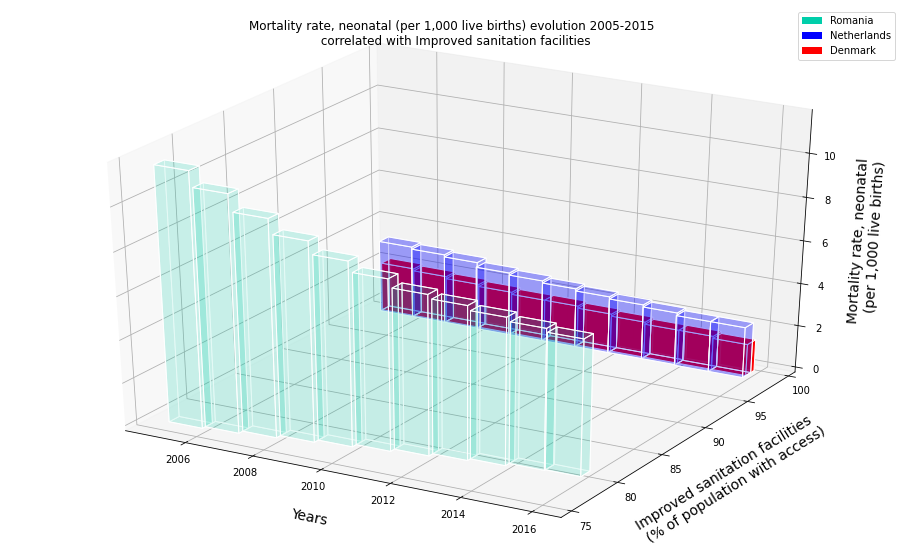

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Mortality rate, neonatal (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Mortality rate, neonatal (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Norway']['Year']
ypos = dfu1[dfu1['Country'] == 'Norway']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Norway']['Mortality rate, neonatal (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Mortality rate, neonatal \n (per 1,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Mortality rate, neonatal (per 1,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()

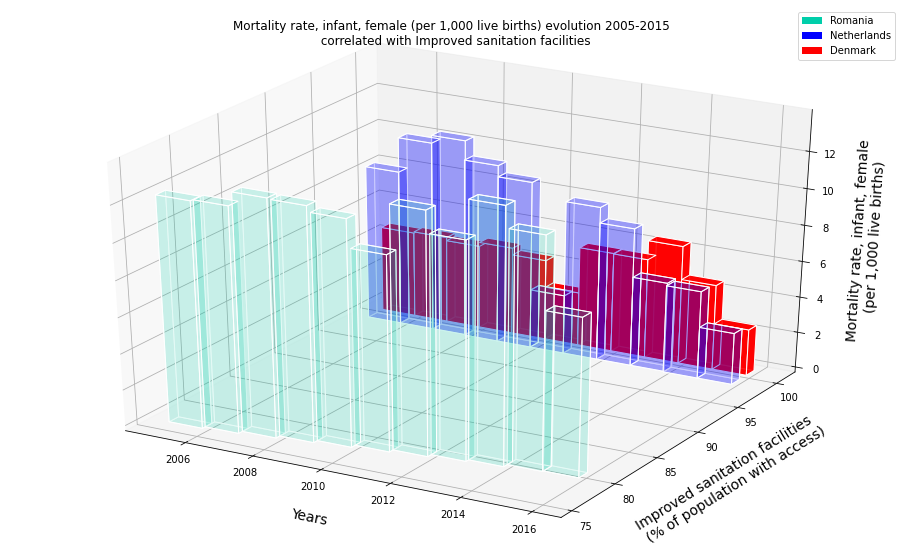

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Mortality rate, infant, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Mortality rate, infant, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Denmark']['Year']
ypos = dfu1[dfu1['Country'] == 'Denmark']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Denmark']['Mortality rate, infant, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Mortality rate, infant, female \n (per 1,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Mortality rate, infant, female (per 1,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()

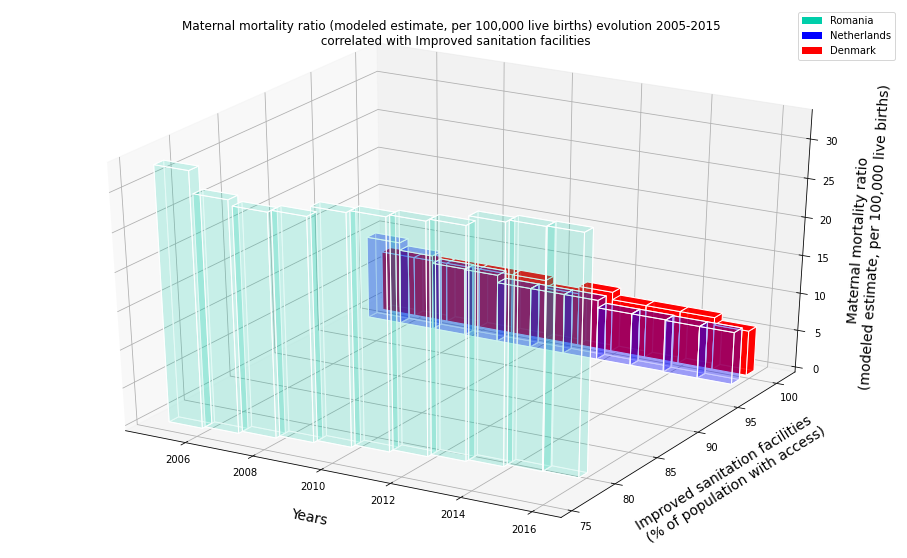

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Denmark']['Year']
ypos = dfu1[dfu1['Country'] == 'Denmark']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Denmark']['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Maternal mortality ratio \n (modeled estimate, per 100,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Maternal mortality ratio (modeled estimate, per 100,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()